# Comparing edge bet centralities

- Predictive ties are structurally critical.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import copy
from scipy.sparse import csr_matrix
import time


Bad key text.latex.unicode in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')


In [2]:
with open('../../data/05_model_outputs/network_new_edge_bet_centrality_dic.pickle', 'rb') as f:
    network_edge_bet_centrality_dic = pickle.load(f)


In [3]:
# 
fig_location = '../../../economic-strength-of-weak-mobility-ties-paper-/figs/'

In [4]:
network_edge_bet_centrality_dic.keys()

dict_keys(['boston', 'miami', 'chicago'])

In [5]:
network_edge_bet_centrality_dic['boston'].keys()

dict_keys(['spatial_weak_edge_bet_centrality_list', 'weak_edge_bet_centrality_list', 'spatial_agg_edge_bet_centrality_list', 'agg_edge_bet_centrality_list', 'spatial_strong_edge_bet_centrality_list', 'strong_edge_bet_centrality_list', 'edge_count_list', 'weak_mobility_tie_names', 'strong_mobility_tie_names'])

In [6]:
for city in ['boston','chicago','miami']:
    normalized_weak_list = []
    normalized_strong_list = []
    normalized_agg_list = []

    for idx in range(len(network_edge_bet_centrality_dic[city]['weak_edge_bet_centrality_list'])):
        normalized_weak = network_edge_bet_centrality_dic[city]['weak_edge_bet_centrality_list'][idx]/network_edge_bet_centrality_dic[city]['spatial_weak_edge_bet_centrality_list'][idx]
        normalized_strong = network_edge_bet_centrality_dic[city]['strong_edge_bet_centrality_list'][idx]/network_edge_bet_centrality_dic[city]['spatial_strong_edge_bet_centrality_list'][idx]
        normalized_agg = network_edge_bet_centrality_dic[city]['agg_edge_bet_centrality_list'][idx]/network_edge_bet_centrality_dic[city]['spatial_agg_edge_bet_centrality_list'][idx]
        normalized_weak_list.append(normalized_weak)
        normalized_strong_list.append(normalized_strong)
        normalized_agg_list.append(normalized_agg)

    network_edge_bet_centrality_dic[city]['normalized_weak_list']=normalized_weak_list
    network_edge_bet_centrality_dic[city]['normalized_strong_list']=normalized_strong_list
    network_edge_bet_centrality_dic[city]['normalized_agg_list']=normalized_agg_list
    

In [7]:
for city in ['boston','chicago','miami']:
    for key_ in network_edge_bet_centrality_dic[city].keys():
        network_edge_bet_centrality_dic[city][key_] = pd.Series(network_edge_bet_centrality_dic[city][key_])


In [8]:
network_edge_bet_centrality_df_dic = {}
for city in ['boston','chicago','miami']:
    network_edge_bet_centrality_df_dic[city] = pd.concat(network_edge_bet_centrality_dic[city], axis = 1)


In [9]:
# 
df_dic = {}
for city in ['boston','chicago','miami']:
    df_dic[city] = pd.DataFrame({'edge_bet_centrality':list(network_edge_bet_centrality_df_dic[city]['normalized_weak_list'])+list(network_edge_bet_centrality_df_dic[city]['normalized_strong_list'])+list(network_edge_bet_centrality_df_dic[city]['normalized_agg_list']), 
                   'edge_cat':['weak']*network_edge_bet_centrality_df_dic[city].shape[0] + ['strong']*network_edge_bet_centrality_df_dic[city].shape[0] + ['agg']*network_edge_bet_centrality_df_dic[city].shape[0], 
                   'city':[city]*3*network_edge_bet_centrality_df_dic[city].shape[0]})

df_dic[city]


,edge_bet_centrality,edge_cat,city
0,2.276632,weak,miami
1,2.334124,weak,miami
2,2.303915,weak,miami
3,7.258977,weak,miami
4,1.923519,weak,miami
...,...,...,...
226,1.122142,agg,miami
227,1.207044,agg,miami
228,1.292166,agg,miami
229,1.213627,agg,miami


In [10]:
# concat the dictionary
df = pd.concat([df_dic['boston'],df_dic['chicago'],df_dic['miami']], axis = 0)

In [11]:
df

,edge_bet_centrality,edge_cat,city
0,3.450997,weak,boston
1,2.313928,weak,boston
2,2.815186,weak,boston
3,3.549344,weak,boston
4,3.620139,weak,boston
...,...,...,...
226,1.122142,agg,miami
227,1.207044,agg,miami
228,1.292166,agg,miami
229,1.213627,agg,miami


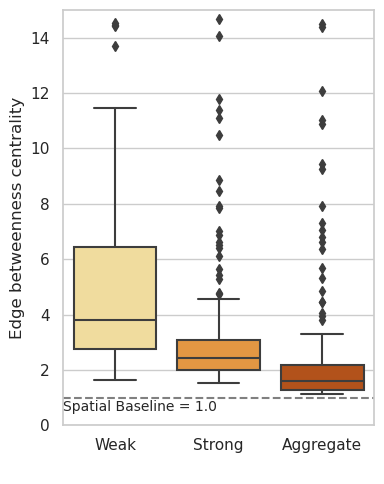

In [12]:
# visualizing the aggreagate edge bet centralities

import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize = (4,5))

sns.boxplot(x="edge_cat", y="edge_bet_centrality", data=df, ax = ax, palette='YlOrBr')
ax.axhline(1.0, linestyle = '--', color = 'grey')
ax.annotate("Spatial Baseline = 1.0",
            xy=(-0.5, 0.5), xycoords = 'data',
            xytext=(-0.5, 0.5), textcoords = 'data',
            size = 10)

params = {
     'legend.fontsize': 20,
     'axes.labelsize': 20,
     'axes.titlesize': 30,
     'xtick.labelsize': 20,
     'ytick.labelsize': 20}

ax.set_ylim([0,15])
ax.set_xlabel(" ")
ax.set_ylabel("Edge betweenness centrality")
ax.set_xticklabels(['Weak','Strong','Aggregate'])

plt.tight_layout()
plt.show()

fig.savefig(fig_location+'edge_bet_centrality_total.png')

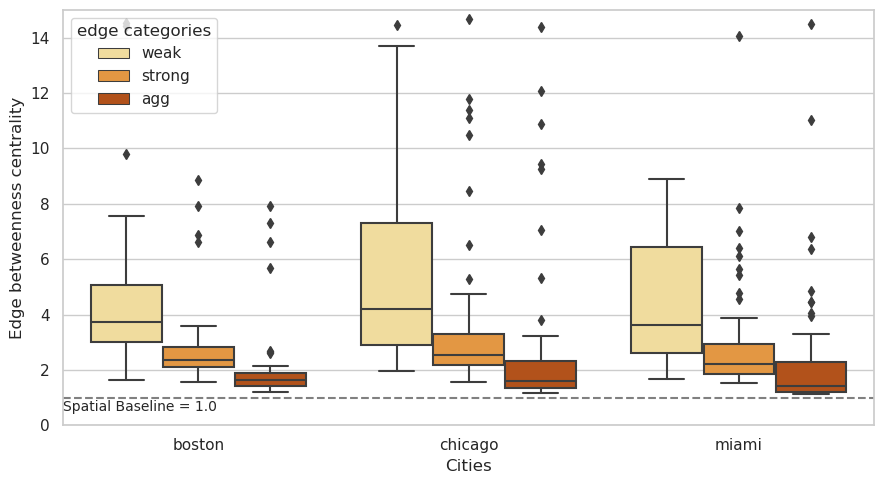

In [13]:
# visualizing the edge bet centralities of three cities

import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize = (9,5))

sns.boxplot(x="city", y="edge_bet_centrality", hue="edge_cat", data=df, ax = ax, palette='YlOrBr')
ax.axhline(1.0, linestyle = '--', color = 'grey')
ax.annotate("Spatial Baseline = 1.0",
            xy=(-0.5, 0.5), xycoords = 'data',
            xytext=(-0.5, 0.5), textcoords = 'data',
            size = 10)
ax.legend(title = 'edge categories')

params = {
     'legend.fontsize': 20,
     'axes.labelsize': 20,
     'axes.titlesize': 30,
     'xtick.labelsize': 20,
     'ytick.labelsize': 20}

ax.set_ylim([0,15])
ax.set_xlabel("Cities")
ax.set_ylabel("Edge betweenness centrality")

plt.tight_layout()
plt.show()

fig.savefig(fig_location+'edge_bet_centrality_cities.png')
